# Introduction to Machine Learning and Toolkit Exercises 

## Introduction

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements. The data we will use are in a file called `Iris_Data.csv` found in the [GitHub repository](https://github.com/rosalvoneto/InteligenciaComputacional).

## Question 1

Load the data from the file using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [1]:
# Importar e visualizar
import pandas as pd

df = pd.read_csv('data/Iris_Data.csv')

In [3]:
#The number of data points (rows).
df.shape[0]

150

In [4]:
# Column names
df.shape[1]

5

In [5]:
# Data types
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## Question 2

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter. 

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html).

In [7]:
# Code Here
df['species'] = (df
                 .species
                 .apply(
                     lambda x: x.replace('Iris-', '')
                 ))

df.species.sample(n=5, replace=False)

9          setosa
62     versicolor
38         setosa
68     versicolor
147     virginica
Name: species, dtype: object

## Question 3

Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* Performing Statistical Calculations: count, mean, std....

In [9]:
# The number of each species present
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [10]:
# Performing Statistical Calculations
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Question 4

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group by species before calculating the statistic.

In [17]:
# The mean calculation
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [18]:
# The median calculation
df.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


## Question 5

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

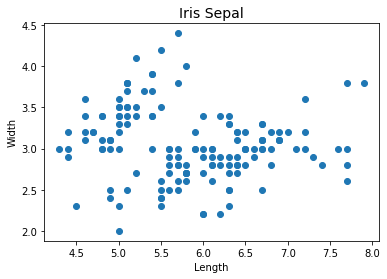

In [29]:
# Code Here
import matplotlib.pyplot as plt

plt.xlabel("Length")
plt.ylabel("Width")
plt.title("Iris Sepal", size=14)
plt.plot(df.sepal_length, df.sepal_width, ls='', marker='o')

## Question 6

Make a histogram of any one of the four features. Label axes and title it as appropriate. 

(array([ 4., 33., 11.,  2.,  0.,  0.,  1.,  2.,  3.,  5., 12., 14., 12.,
        17.,  6., 12.,  7.,  4.,  2.,  3.]),
 array([1.   , 1.295, 1.59 , 1.885, 2.18 , 2.475, 2.77 , 3.065, 3.36 ,
        3.655, 3.95 , 4.245, 4.54 , 4.835, 5.13 , 5.425, 5.72 , 6.015,
        6.31 , 6.605, 6.9  ]),
 <BarContainer object of 20 artists>)

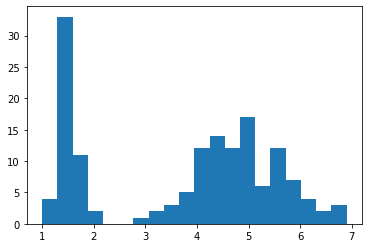

In [22]:
# Code Here
plt.hist(df.petal_length, bins=20)

## Question 7

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

<AxesSubplot:>

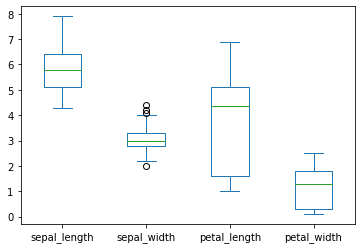

In [23]:
# Code Here
df.plot.box()

## Question 8

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.

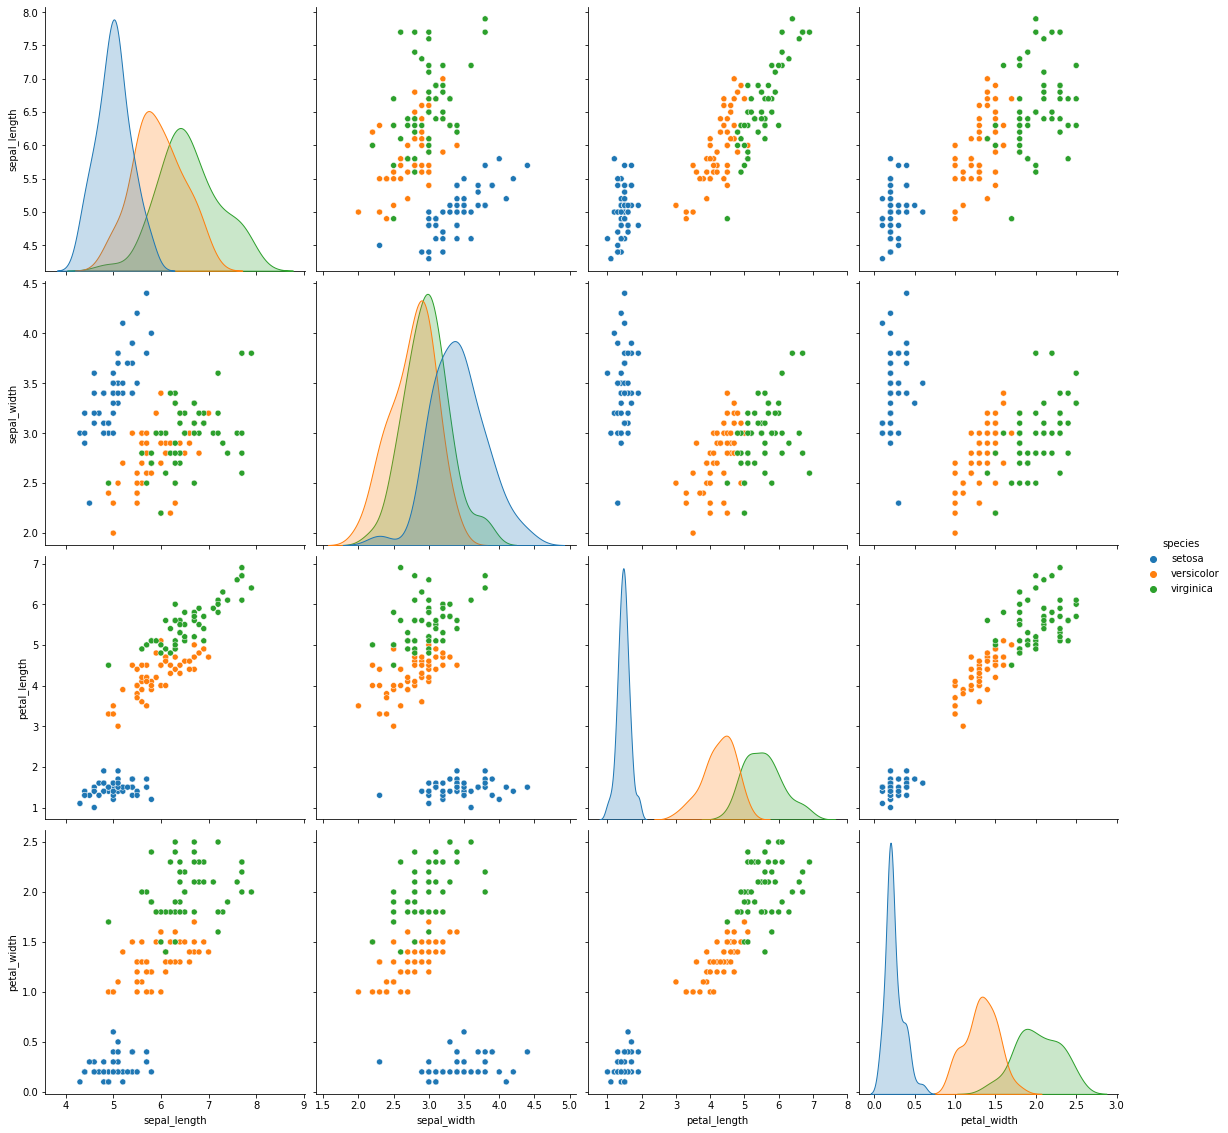

In [26]:
# Code Here
import seaborn as sns

sns.pairplot(df, hue='species', height=4)